# Metocean altimetry track comparison for global wave model 

This notebook will demonstrate the use of ModelSkill on a larger dataset containing more than 9 million satellite track observation points. 

Note: requires running the `download.ipynb` first! 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import modelskill as ms
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')

# Big data
Run the download.ipynb first

In [2]:
fn = '../data/SW_gwm_3a_extracted_2018.dfs0'
mr = ms.ModelResult(fn, name='GWM', item='Sign. Wave Height', gtype="track")
mr

<TrackModelResult> 'GWM' (n_points: 9141126)

In [3]:
o1 = ms.TrackObservation('../data/altimetry_3a_2018_filter1.dfs0', item=2, name='3a')

In [4]:
cmp = ms.compare(o1, mr)[0]  # compare returns a list of comparison objects, here we only have one

In [5]:
cmp.sel(end='2018-1-15').skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
3a,372399,-0.475266,0.633188,0.418388,0.510794,0.940363,0.124046,0.719939


In [6]:
cmp.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
3a,9111762,-0.490248,0.647898,0.42359,0.521119,0.942401,0.123508,0.719179


## Spatial skill

Spatial skill with 1 deg bins and default bin edges.

In [7]:
ss = cmp.grid_skill(metrics=['bias'], bins=(np.arange(-180,180,1), np.arange(-90,90,1)), n_min=20)

Add attrs and plot

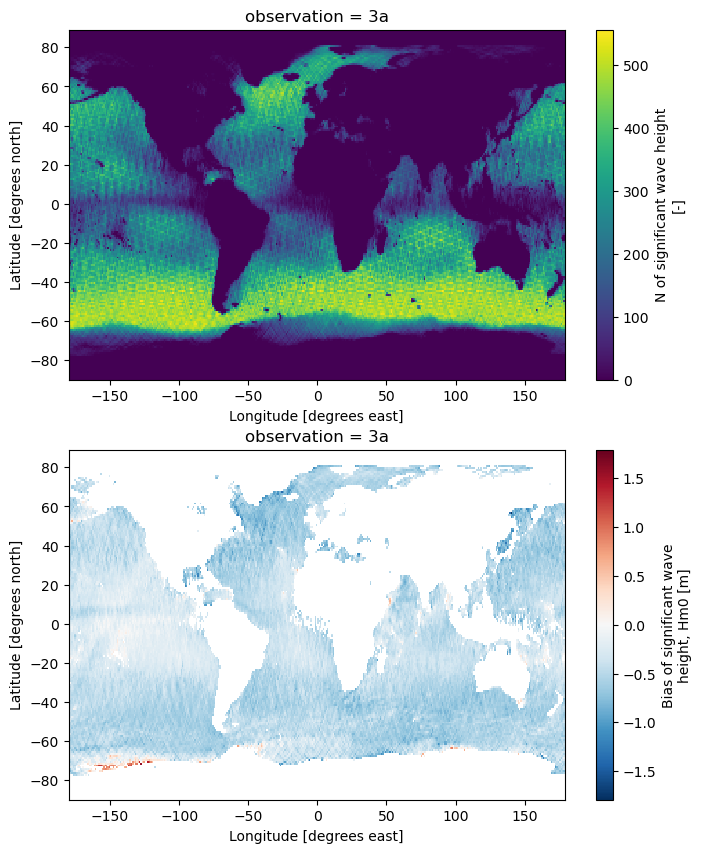

In [8]:
ss.ds['bias'].attrs = dict(long_name="Bias of significant wave height, Hm0",units="m")
ss.ds['n'].attrs = dict(long_name="N of significant wave height",units="-")
fig, axes = plt.subplots(ncols=1, nrows=2, figsize = (8, 10))
ss.plot('n', ax=axes[0])
ss.plot('bias', ax=axes[1]);

## Multiple bins - spatial skill for wave height 

Use all_df to obtain and df argument to pass customized data back to comparer.

In [9]:
all_df = cmp.to_dataframe()
mean_val = all_df[['mod_val','obs_val']].mean(axis=1)
all_df['val_cat'] = pd.cut(mean_val,[0,2,5,np.inf],labels=["Hm0[m]=[0, 2)","Hm0[m]=[2, 5)","Hm0[m]=[5, inf)"])
all_df.head()

,x,y,obs_val,mod_val,model,observation,val_cat
time,,,,,,,
2018-01-01 00:00:00,-33.706020,23.181158,2.611,2.292599,GWM,3a,"Hm0[m]=[2, 5)"
2018-01-01 00:00:01,-33.720741,23.240074,2.608,2.292612,GWM,3a,"Hm0[m]=[2, 5)"
2018-01-01 00:00:02,-33.735474,23.298990,2.518,2.292624,GWM,3a,"Hm0[m]=[2, 5)"
2018-01-01 00:00:03,-33.750214,23.357904,2.729,2.292637,GWM,3a,"Hm0[m]=[2, 5)"
2018-01-01 00:00:04,-33.764965,23.416819,2.593,2.292650,GWM,3a,"Hm0[m]=[2, 5)"


In [10]:
cmp.data["val_cat"] = all_df["val_cat"]

In [11]:
ss = cmp.grid_skill(by=["val_cat"], metrics=["bias"], bins=(np.arange(-180,180,5), np.arange(-90,90,5)), n_min=20)

In [12]:
ss.ds['bias'].attrs = dict(long_name="Bias of significant wave height, Hm0", units="m")
ss.ds['n'].attrs = dict(long_name="N of significant wave height", units="-")
ss.ds['val_cat'].attrs = dict(long_name="Range of sign. wave height, Hm0", units="m")

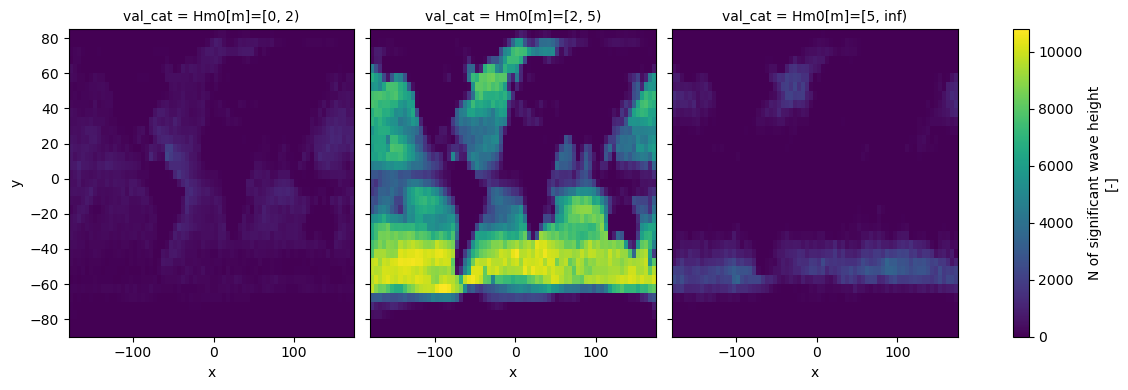

In [13]:
ss.plot('n', figsize=(12,4));

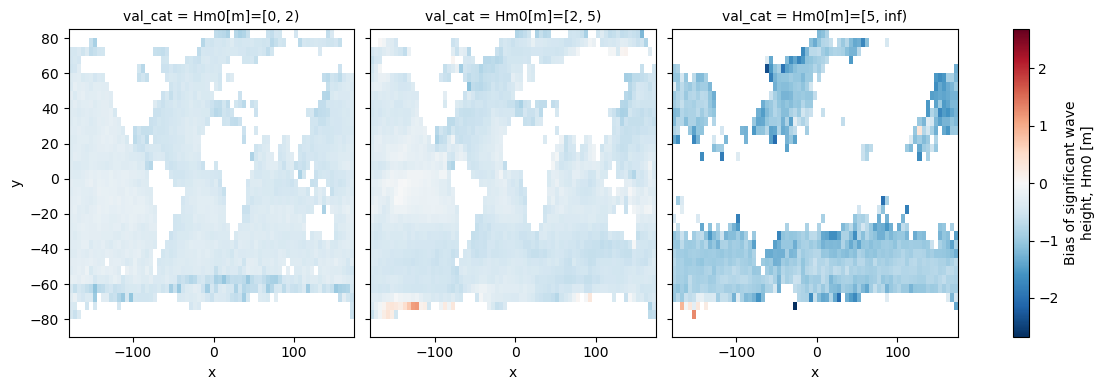

In [14]:
ss.plot('bias', figsize=(12,4));

## Map
http://xarray.pydata.org/en/stable/plotting.html#maps

Requires cartopy: https://scitools.org.uk/cartopy/docs/latest/installing.html